# Wine Quality Prediction
The task here is to predict the quality of red wine on a scale of 0–10 given a set of features as inputs. I have solved it as a regression problem using Linear Regression.
The dataset used is Wine Quality Data set from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Import Dependencies

In [92]:
%matplotlib notebook
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [93]:
data = pd.read_csv('winequality-red.csv', sep=';') # because our csv file has seperator ';' instead of ','
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [94]:
print(data.keys())

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [95]:
data.shape

(1599, 12)

In [96]:
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [97]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [98]:
data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<IPython.core.display.Javascript object>


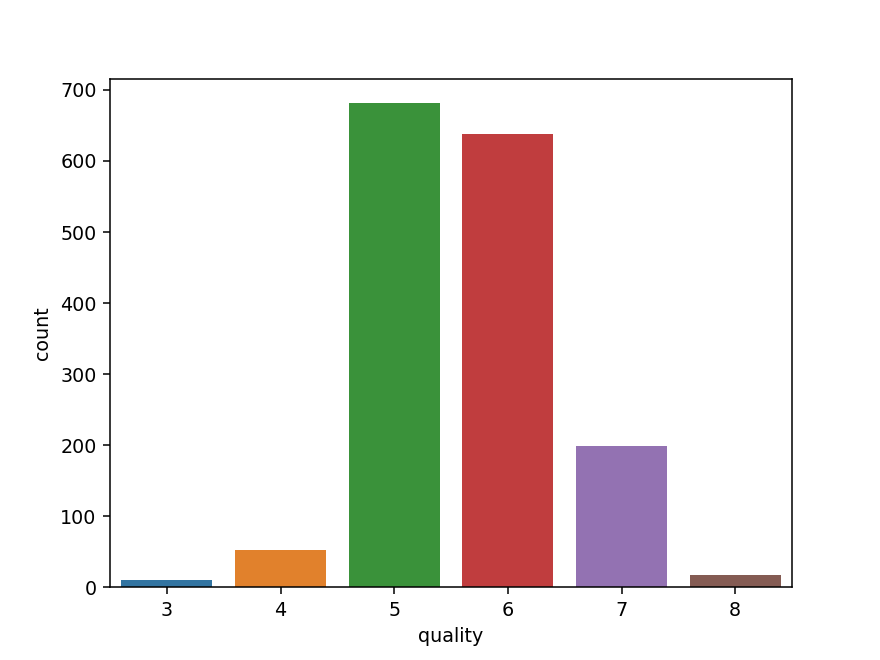

In [99]:
sns.countplot(x='quality', data=data)
plt.show()

In [100]:
conditions = [ (data['quality'] >= 7),
              (data['quality'] <= 4)  ]

rating = ['superior', 'inferior']
data['rating'] = np.select(conditions, rating, default='fine')
data.rating.value_counts()

fine        1319
superior     217
inferior      63
Name: rating, dtype: int64

In [101]:
data.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
fine,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
inferior,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
superior,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [102]:
correlations = data.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


<IPython.core.display.Javascript object>


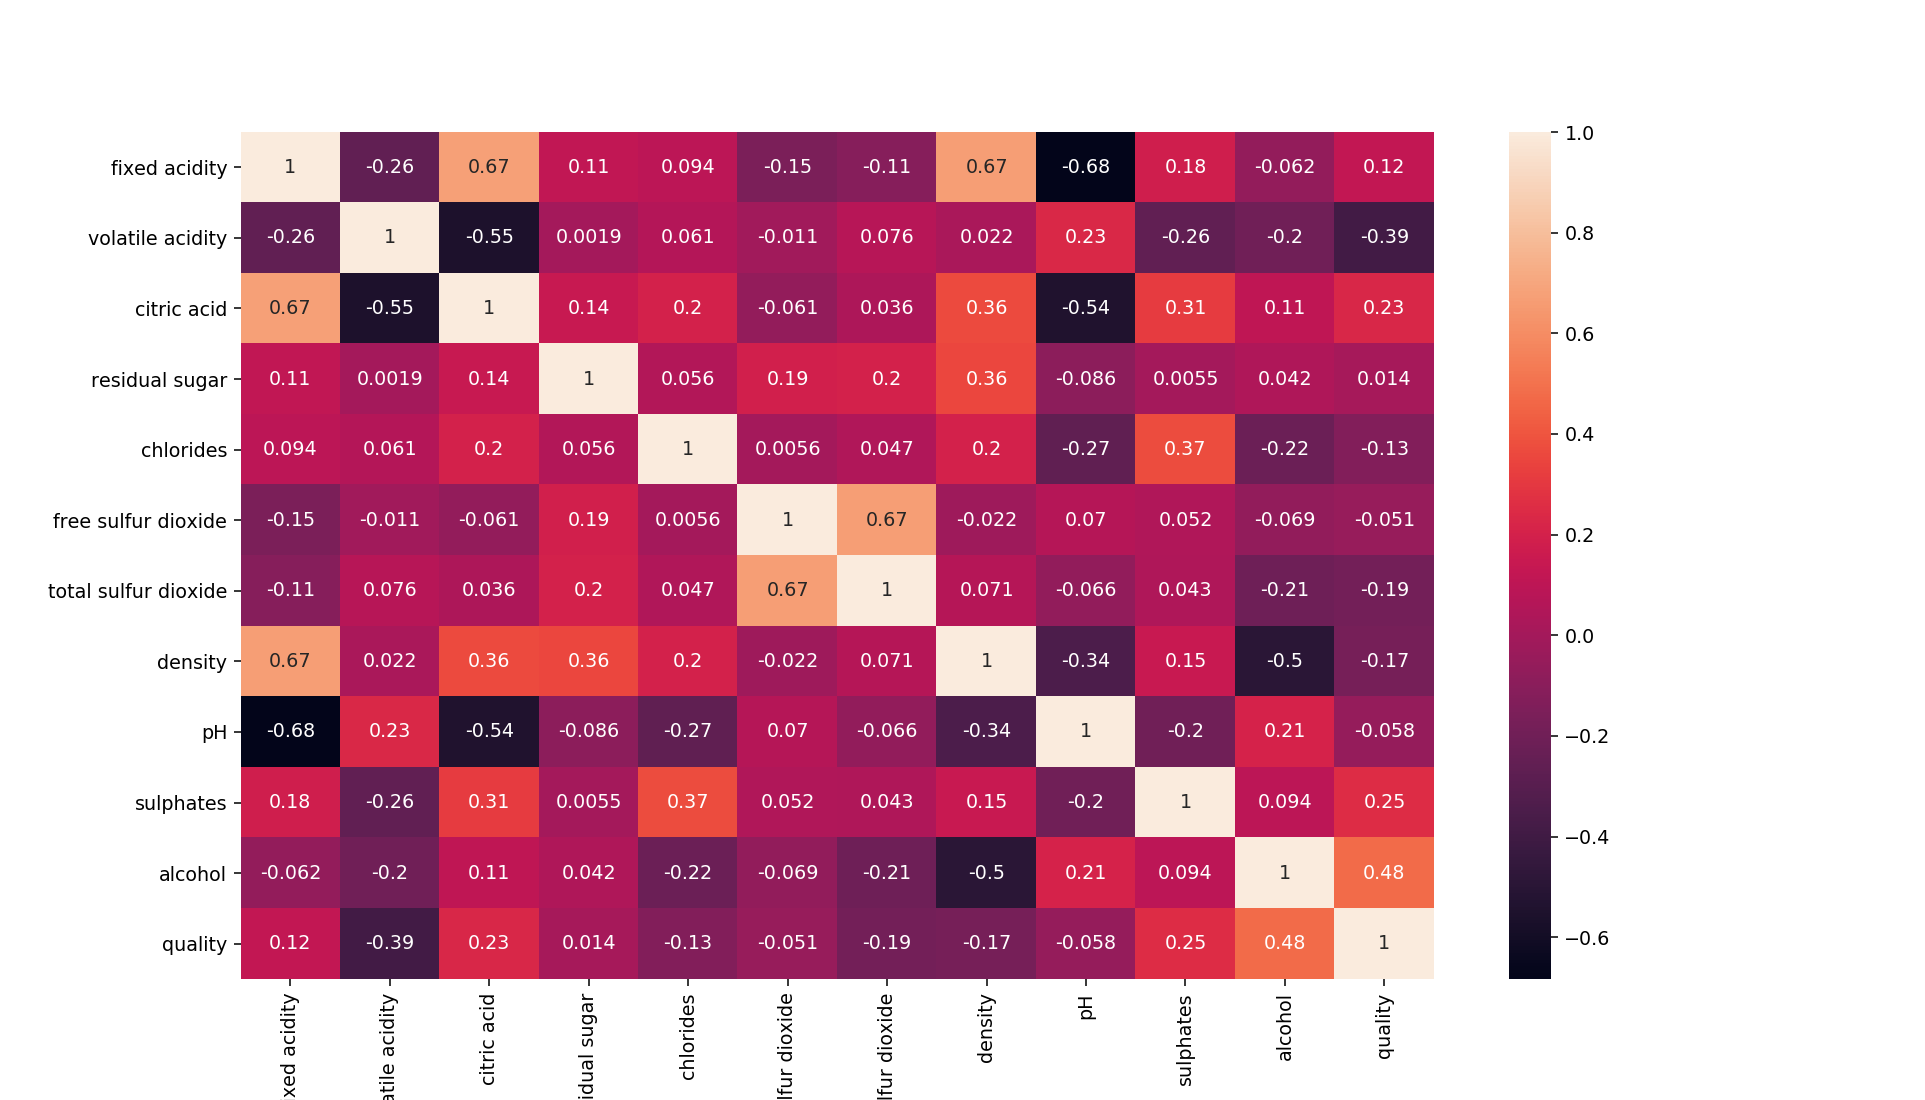

In [103]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, linewidths=0)
plt.show()

## Alcohol Percent vs Wine Quality

<IPython.core.display.Javascript object>


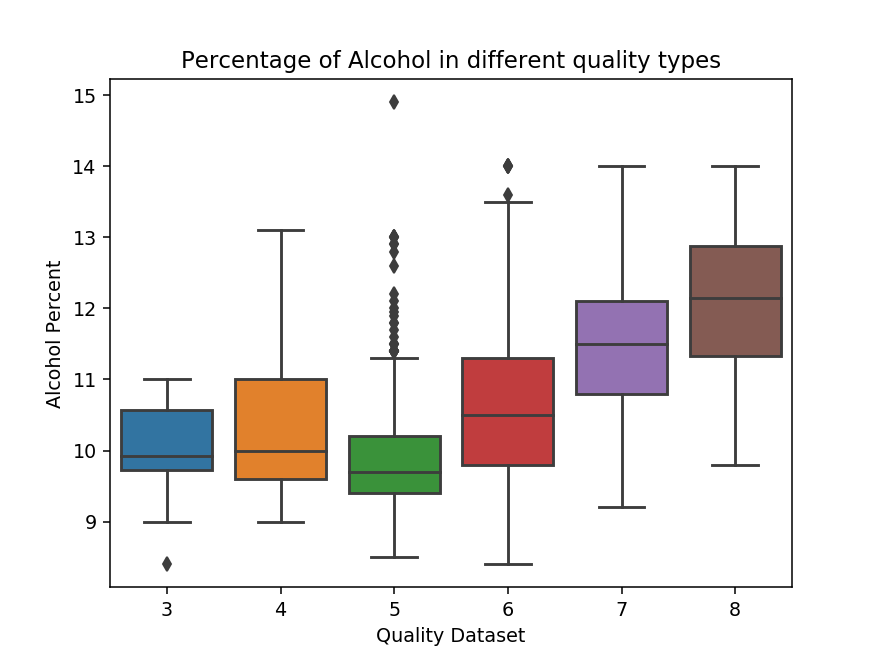

[Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 0, 'Quality Dataset'),
 Text(0.5, 1.0, 'Percentage of Alcohol in different quality types')]

In [104]:
plt.figure()
Alcohol = sns.boxplot(x='quality', y='alcohol', data=data)

Alcohol.set(xlabel="Quality Dataset", ylabel="Alcohol Percent", 
            title="Percentage of Alcohol in different quality types")

## Sulphates vs Rating Dataset

<IPython.core.display.Javascript object>


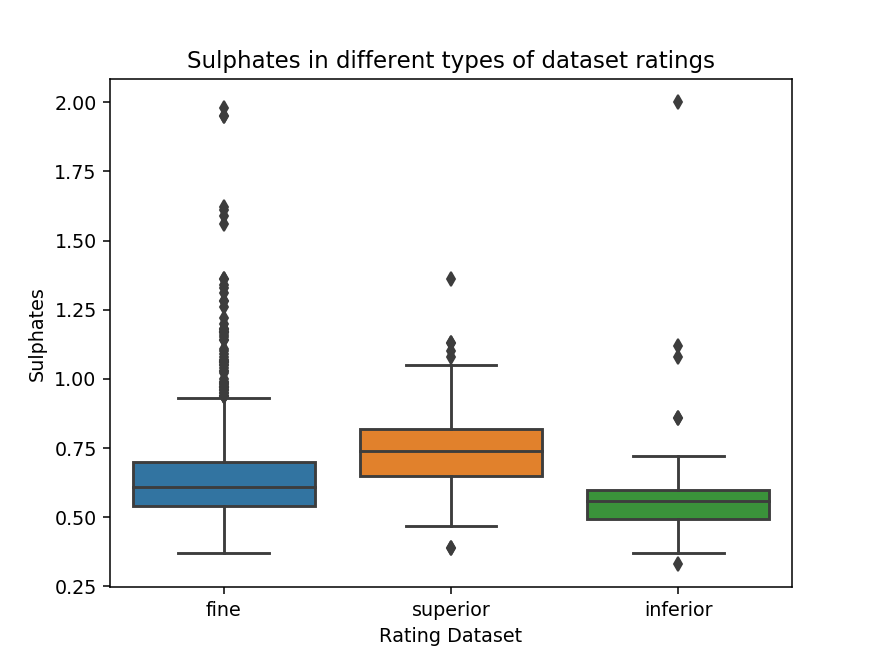

[Text(0, 0.5, 'Sulphates'),
 Text(0.5, 0, 'Rating Dataset'),
 Text(0.5, 1.0, 'Sulphates in different types of dataset ratings')]

In [105]:
plt.figure()
Sulphates = sns.boxplot(x='rating', y='sulphates', data=data)

Sulphates.set(xlabel='Rating Dataset', ylabel='Sulphates', title='Sulphates in different types of dataset ratings')

<IPython.core.display.Javascript object>


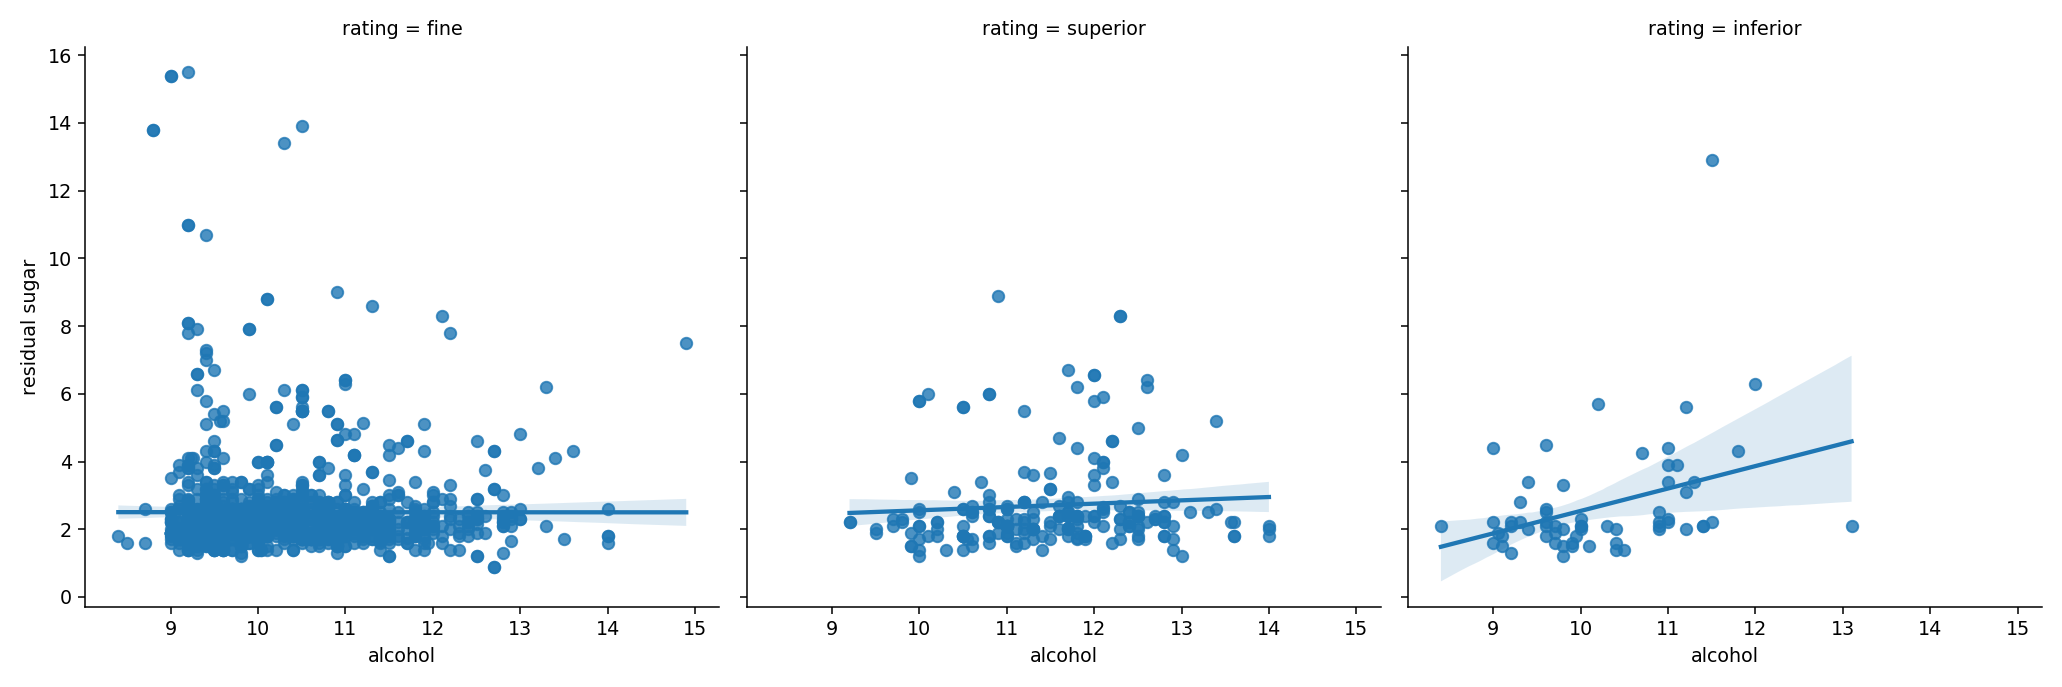

In [112]:
sns.lmplot(x='alcohol', y='residual sugar', col='rating', data=data)

## Preparing Data for Modelling

In [150]:
dataset = pd.read_csv('winequality-red.csv', sep=';')
dataset.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [151]:
from sklearn.preprocessing import StandardScaler

X1 = dataset.drop(['quality'], axis=1)
X = StandardScaler().fit_transform(X1)

y = dataset['quality']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=0)

## Decision Tree

In [153]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model_one = DecisionTreeClassifier(random_state=1)
model_one.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [154]:
y_pred_one = model_one.predict(X_test)

print(classification_report(y_test, y_pred_one))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.14      0.14      0.14        14
           5       0.73      0.68      0.70       169
           6       0.71      0.66      0.68       170
           7       0.38      0.60      0.47        40
           8       0.25      0.20      0.22         5

    accuracy                           0.64       400
   macro avg       0.37      0.38      0.37       400
weighted avg       0.65      0.64      0.64       400



## Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

model_two = RandomForestClassifier(random_state=1)
model_two.fit(X_train, y_train)

y_pred_two = model_two.predict(X_test)

print(classification_report(y_test, y_pred_two))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.74      0.79      0.77       169
           6       0.68      0.70      0.69       170
           7       0.53      0.60      0.56        40
           8       0.00      0.00      0.00         5

    accuracy                           0.69       400
   macro avg       0.33      0.35      0.34       400
weighted avg       0.66      0.69      0.67       400



C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feature Importance - via Random Forest

<IPython.core.display.Javascript object>


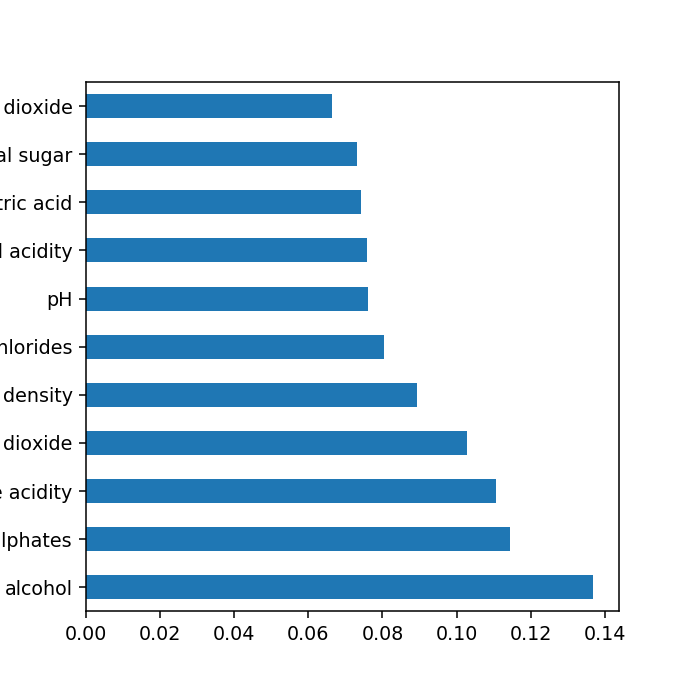

In [162]:
plt.figure()
feat_importances = pd.Series(model_two.feature_importances_, index=X1.columns)
feat_importances.nlargest(25).plot(kind='barh', figsize=(5,5))